In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
plt.style.use('seaborn-whitegrid')
from utils import PkdbModel, convert_unit, \
    caffeine_idx,pktype_data,abs_idx,rel_idx,filter_out,filter_df,group_idx,individual_idx
from scipy import stats
from collections import namedtuple


def _regression(t, c):
    """ Linear regression on the log timecourse after maximal value.
    No check is performed if already in equilibrium distribution !.
    The linear regression is calculated from all data points after the maximum.

    :return:
    """
    # TODO: check for distribution and elimination part of curve.
    max_index = np.argmax(c)
    # linear regression
    x = t[max_index :]
    y = np.log(c[max_index :])
    if max_index == (len(c) - 1):
        return [np.nan] * 6
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return [slope, intercept, r_value, p_value, std_err, max_index]



In [5]:
from pkdb_app.analysis.pharmacokinetic import f_pk

In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
caffeine_tc = PkdbModel("caffeine_timecourse",destination="3-inferred")
caffeine_tc.read()
caffeine_tc.to_array()
caffeine_timecourse = caffeine_tc.data

In [8]:
caffeine_timecourse.groupby(('oral contraceptives', 'choice')).get_group('Y')[["study","value","mean","unit_intervention","unit","subject_type","time_unit","subject_type"]]

,study,value,mean,unit_intervention,unit,subject_type,time_unit,subject_type
101,Patwardhan1980,NaN,"[3.79, 6.32, 6.83, 7.37, 6.0, 6.29, 5.09, 4.81...",mg,µg/ml,group,h,group
372,Patwardhan1980,NaN,"[3.79, 6.32, 6.83, 7.37, 6.0, 6.29, 5.09, 4.81...",mg/kg,µg/ml,group,h,group
385,Patwardhan1980,NaN,"[0.06489726, 0.10821918, 0.11695205, 0.1261986...",mg,µg/ml/kg,group,h,group
394,Patwardhan1980,NaN,"[0.06489726, 0.10821918, 0.11695205, 0.1261986...",mg/kg,µg/ml/kg,group,h,group


In [9]:
r_caffeine_idx = (caffeine_timecourse["unit"]=="µg/ml") & (caffeine_timecourse["unit_intervention"]=="mg")& (caffeine_timecourse["time_unit"]=="h")
caffeine_timecourse_abs = caffeine_timecourse[r_caffeine_idx]
caffeine_timecourse_abs["outlier"] = False
caffeine_timecourse_abs.loc[caffeine_timecourse_abs["study"] == "Balogh1992","outlier"] = True

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
caffeine_timecourse_abs.groupby("study").get_group("Balogh1992")[["time","value","substance_name","value_intervention","time_unit"]]


,time,value,substance_name,value_intervention,time_unit
3,"[2.0, 10.0]","[3.06, 0.12]",caffeine,225.0,h
4,"[2.0, 10.0]","[2.68, 0.17]",caffeine,225.0,h
5,"[2.0, 10.0]","[2.62, 0.17]",caffeine,225.0,h
6,"[2.0, 10.0]","[2.94, 0.18]",caffeine,225.0,h
7,"[2.0, 10.0]","[2.56, 0.22]",caffeine,225.0,h
8,"[2.0, 10.0]","[2.94, 0.33]",caffeine,225.0,h
9,"[2.0, 10.0]","[4.35, 0.73]",caffeine,225.0,h
10,"[2.0, 10.0]","[4.06, 1.3]",caffeine,225.0,h
11,"[2.0, 10.0]","[4.18, 1.39]",caffeine,225.0,h
12,"[2.0, 10.0]","[4.96, 1.62]",caffeine,225.0,h


In [11]:
def clearance(kwargs):
    dose = kwargs["value_intervention"]
    t = kwargs["time"]
    if kwargs["subject_type"] == "individual":
        c = kwargs["value"]
    else:
        c = kwargs["mean"]
    [slope, intercept, r_value, p_value, std_err,max_index] =_regression(t,c)
    vd = dose/np.exp(intercept)
    kel = -slope
    clearance = kel*vd
    return clearance
    
    

    

In [12]:
caffeine_timecourse_abs["clearance"] = caffeine_timecourse_abs.apply(lambda x: clearance(x),axis=1)
caffeine_timecourse_bal = caffeine_timecourse_abs.groupby("study").get_group("Balogh1992") 
caffeine_clr =  PkdbModel("caffeine_clearance",destination="3-inferred")
caffeine_clr.read()
caffeine_clearance = caffeine_clr.data
caffeine_clearance_idx = (caffeine_clearance["unit_intervention"]=="mg") & (caffeine_clearance["unit"]=="l/h")
caffeine_clearance = caffeine_clearance[caffeine_clearance_idx]
caffeine_clearance["clearance"] = caffeine_clearance["value"]
caffeine_clearance_bal = caffeine_clearance.groupby("study").get_group("Balogh1992")
print(len(caffeine_clearance_bal))
print(len(caffeine_timecourse_bal))

caffeine_clearance_concat = pd.concat([caffeine_timecourse_bal,caffeine_clearance_bal], ignore_index=True)

73
72


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/numpy/lib/function_base.py:2320: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

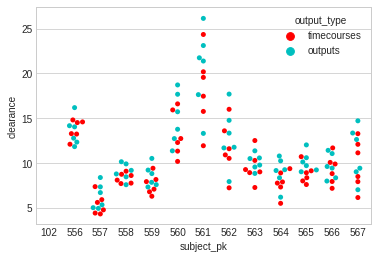

In [13]:
sns.swarmplot(x="subject_pk", y="clearance", hue="output_type",
              palette=["r", "c"], data=caffeine_clearance_concat)

In [14]:
caffeine_clearance_bal[["clearance","unit","value_intervention","unit_intervention", "subject_pk"]].head()

,clearance,unit,value_intervention,unit_intervention,subject_pk
1209,12.348,l/h,225.0,mg,556
1210,12.789,l/h,225.0,mg,556
1211,11.844,l/h,225.0,mg,556
1212,14.049,l/h,225.0,mg,556
1213,14.175,l/h,225.0,mg,556


In [15]:
caffeine_timecourse_bal[["clearance","unit","value_intervention","unit_intervention", "subject_pk"]].head()

,clearance,unit,value_intervention,unit_intervention,subject_pk
3,13.246584,µg/ml,225.0,mg,556
4,14.524289,µg/ml,225.0,mg,556
5,14.818570,µg/ml,225.0,mg,556
6,13.291677,µg/ml,225.0,mg,556
7,14.598112,µg/ml,225.0,mg,556


In [16]:
caffeine_timecourse_abs.groupby(["unit","unit_intervention","time_unit","subject_type"]).count()


study  output_type  pk  \
unit  unit_intervention time_unit subject_type                           
µg/ml mg                h         group            19           19  19   
                                  individual       86           86  86   

                                                tissue  substance_name  \
unit  unit_intervention time_unit subject_type                           
µg/ml mg                h         group             19              19   
                                  individual        86              86   

                                                pktype  interventions  \
unit  unit_intervention time_unit subject_type                          
µg/ml mg                h         group             19             19   
                                  individual        86             86   

                                                individual_pk  value  \
unit  unit_intervention time_unit subject_type                         
µg/ml mg                h         group                     0      0   
                                  individual               86     86   

                                                group_pk    ...      \
unit  unit_intervention time_unit subject_type              ...       
µg/ml mg                h         group               19    ...       
                                  individual           0    ...       

                                                (metabolic ratio, mean)  \
unit  unit_intervention time_unit subject_type                            
µg/ml mg                h         group                               0   
                                  individual                          0   

                                                (metabolic ratio, min)  \
unit  unit_intervention time_unit subject_type                           
µg/ml mg                h         group                              0   
                                  individual                         0   

                                                (metabolic ratio, unit)  \
unit  unit_intervention time_unit subject_type                            
µg/ml mg                h         group                               0   
                                  individual                          0   

                                                (fat weight, count)  \
unit  unit_intervention time_unit subject_type                        
µg/ml mg                h         group                           0   
                                  individual                      0   

                                                (fat weight, cv)  \
unit  unit_intervention time_unit subject_type                     
µg/ml mg                h         group                        0   
                                  individual                   0   

                                                (fat weight, mean)  \
unit  unit_intervention time_unit subject_type                       
µg/ml mg                h         group                          0   
                                  individual                     0   

                                                (fat weight, se)  \
unit  unit_intervention time_unit subject_type                     
µg/ml mg                h         group                        0   
                                  individual                   0   

                                                (fat weight, unit)  outlier  \
unit  unit_intervention time_unit subject_type                                
µg/ml mg                h         group                          0       19   
                                  individual                     0       86   

                                                clearance  
unit  unit_intervention time_unit subject_type             
µg/ml mg                h         group                17  
                                  individual           84  

[2 rows x 266 colu

In [21]:

def control_idx(data):
    return ( data[ ('smoking', 'choice')] == 'N') \
           & (data.outlier == False) \
           & ((data[ ('oral contraceptives', 'choice')] == 'N') | ((data[('oral contraceptives', 'choice')].isnull()) & (data[('medication', 'choice')] == "N")))

def smoking_idx(data):
    return (data[ ('smoking', 'choice')] == 'Y') \
           & (data.outlier == False) \

def oc_idx(data):
    return (data.outlier == False) \
           & (data[ ('oral contraceptives', 'choice')] == 'Y') 

def outlier_idx(data):
    return  data.outlier == True

def rest_idx(data):
    return (~outlier_idx(data) & ~smoking_idx(data)  & ~oc_idx(data) & ~control_idx(data))

In [22]:
PlotCategory =  namedtuple('PlotCategory', ['name','color', 'marker','data_idx'])

In [23]:
categories_soft = [PlotCategory(name="control", color='black', marker='s', data_idx=control_idx),
              PlotCategory(name="smoking", color='blue', marker='d', data_idx=smoking_idx),
              PlotCategory(name="oc", color='green', marker='o', data_idx=oc_idx),
              PlotCategory(name="outlier", color='red', marker='x', data_idx=outlier_idx),
              PlotCategory(name="rest", color='brown', marker='x', data_idx=rest_idx),
             ]

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


(1.4455323536490621e-05, 46.76477826964751)

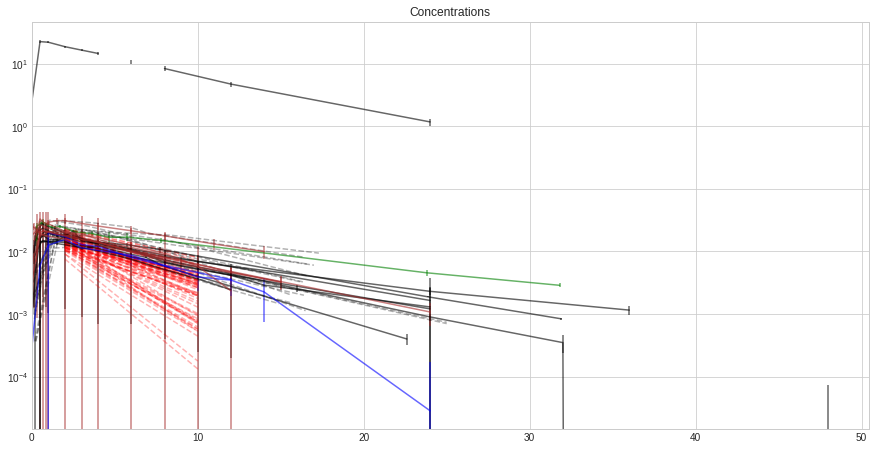

In [27]:
#ns.lineplot(x="time", y="mean",data=caffeine_timecourse_relative)
# caffeine clearance
fig, ax, = plt.subplots(nrows=1, ncols=1, figsize=(15, 7.5))


df = caffeine_timecourse_abs[individual_idx(caffeine_timecourse_abs)]
df_group = caffeine_timecourse_abs[ group_idx(caffeine_timecourse_abs)]

for plot_category in categories_soft:
    #cf_filter = category_filter[category]
    #df_category = filter_df(cf_filter,df)
    df_category = df[plot_category.data_idx(df)]

    for idx,row in df_category.iterrows():
        x = row["time"]
        y = row["value"]/row["value_intervention"]

        ax.plot(x, y,color=plot_category.color, linestyle="--", alpha=0.3,label=None)#marker=markers[category],
        #units = df_category["unit"].unique()
        #unit_intervention = df_category["unit_intervention"].unique()


        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))



    #df_category = filter_df(cf_filter,df_group)
    df_category = df_group[plot_category.data_idx(df_group)]
    df_category = df_category[df_category["mean"].notnull()]
    for idx,row in df_category.iterrows():
        x = row["time"]
        y = row["mean"]/row["value_intervention"]
        y_err = row["se"]/row["value_intervention"]
        ax.errorbar(x, y,yerr=y_err,color=plot_category.color, alpha=0.6,label=None)#marker=markers[category],
        #units = df_category["unit"].unique()
        #unit_intervention = df_category["unit_intervention"].unique()


    #x_group = df_category["time"]
    #y_group = df_category["mean"]
    #count_group = list(df_category[("weight","count")])



ax.set_title('Concentrations')
ax.set_xlim(left=0)
ax.set_yscale("log")
ax.set_ylim(bottom=0)
#ax.legend()


In [30]:
df_category

,study,output_type,pk,tissue,substance_name,pktype,unit,interventions,individual_pk,value,...,"(metabolic ratio, mean)","(metabolic ratio, min)","(metabolic ratio, unit)","(fat weight, count)","(fat weight, cv)","(fat weight, mean)","(fat weight, se)","(fat weight, unit)",outlier,clearance
1,Beach1986,timecourses,439,plasma,caffeine,concentration,µg/ml,234,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,6.165360
80,Culm-Merdek2005,timecourses,538,plasma,caffeine,concentration,µg/ml,280,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,5.557901
81,Haller2002,timecourses,544,plasma,caffeine,concentration,µg/ml,314,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2.524317
96,Kaplan1997,timecourses,577,plasma,caffeine,concentration,µg/ml,488,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,6.054162
97,Kaplan1997,timecourses,585,plasma,caffeine,concentration,µg/ml,490,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,5.326866
373,Blanchard1983a,timecourses,460,plasma,caffeine,concentration,µg/ml,252,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,6.042667
374,Blanchard1983a,timecourses,458,plasma,caffeine,concentration,µg/ml,250,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,5.671048


In [29]:
caffeine_tc.data.groupby(["subject_type","study"]).apply(lambda x : len(x["pk"].unique()))

subject_type  study          
group         Akinyinka2000       1
              Beach1986           2
              Benowitz1995        2
              Benowitz2003        1
              Blanchard1983a      2
              Carbo1989           1
              Culm-Merdek2005     1
              Haller2002          1
              Healy1991           1
              Jeppesen1996        1
              Kaplan1997          2
              Patwardhan1980      3
              Perera2011          2
              Turpault2009        1
individual    Balogh1992         72
              Bonati1982          4
              Lelo1986a           2
              Levy1983           12
              May1982             1
dtype: int64